In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

sns.set_palette('Set3')
plt.rcParams['axes.facecolor'] = '#f0f0f0'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RTECH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\RTECH\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\RTECH\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [142]:
df = pd.read_csv('Reviews.csv')

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [144]:
df.dropna()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [145]:
df = df.head(1000)  #Al ser una mera practica prefiero ahorrar en tiempos de ejecucion

In [146]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

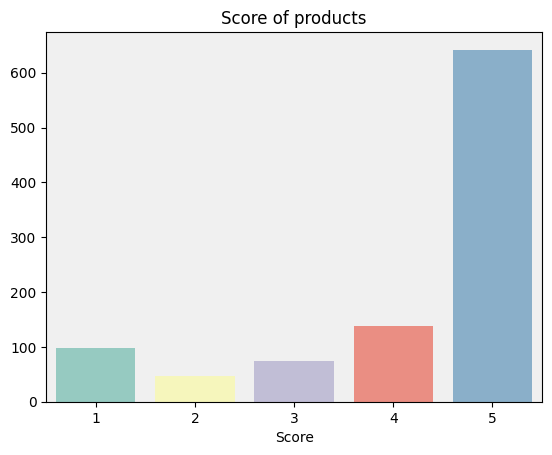

In [147]:
sns.barplot(x=df['Score'].value_counts().index, y=df['Score'].value_counts().values)
plt.rcParams['axes.facecolor'] = '#f0f0f0'
plt.title('Score of products')
plt.show()

Exploraremos un poco el como trabaja el tokenizador

In [148]:
example = df['Text'][244]
print(example)

Ahmad Tea is an excellent looseleaf tea eith hot or for making iced tea. Great flavor with no lingering aftertaste.


In [149]:
token_example = nltk.word_tokenize(example)
print(token_example)

['Ahmad', 'Tea', 'is', 'an', 'excellent', 'looseleaf', 'tea', 'eith', 'hot', 'or', 'for', 'making', 'iced', 'tea', '.', 'Great', 'flavor', 'with', 'no', 'lingering', 'aftertaste', '.']


In [150]:
nltk.pos_tag(token_example)

[('Ahmad', 'NNP'),
 ('Tea', 'NNP'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('excellent', 'JJ'),
 ('looseleaf', 'NN'),
 ('tea', 'NN'),
 ('eith', 'JJ'),
 ('hot', 'JJ'),
 ('or', 'CC'),
 ('for', 'IN'),
 ('making', 'VBG'),
 ('iced', 'JJ'),
 ('tea', 'NN'),
 ('.', '.'),
 ('Great', 'NNP'),
 ('flavor', 'NN'),
 ('with', 'IN'),
 ('no', 'DT'),
 ('lingering', 'VBG'),
 ('aftertaste', 'NN'),
 ('.', '.')]

Podemos ver la manera en que trabaja el mismo

In [151]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [152]:
res = {}

for i, row in df.iterrows():
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)
    

In [153]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [154]:
df_emotions = pd.DataFrame(res).T

In [155]:
df_emotions.head()

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468


In [156]:
df_emotions = df_emotions.reset_index().rename(columns={'index' : 'Id'})
df_emotions = df_emotions.merge(df, how='left')

In [157]:
df_emotions.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [180]:
df_emotions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      1000 non-null   int64  
 1   neg                     1000 non-null   float64
 2   neu                     1000 non-null   float64
 3   pos                     1000 non-null   float64
 4   compound                1000 non-null   float64
 5   ProductId               1000 non-null   object 
 6   UserId                  1000 non-null   object 
 7   ProfileName             1000 non-null   object 
 8   HelpfulnessNumerator    1000 non-null   int64  
 9   HelpfulnessDenominator  1000 non-null   int64  
 10  Score                   1000 non-null   int64  
 11  Time                    1000 non-null   int64  
 12  Summary                 1000 non-null   object 
 13  Text                    1000 non-null   object 
dtypes: float64(4), int64(5), object(5)
memory

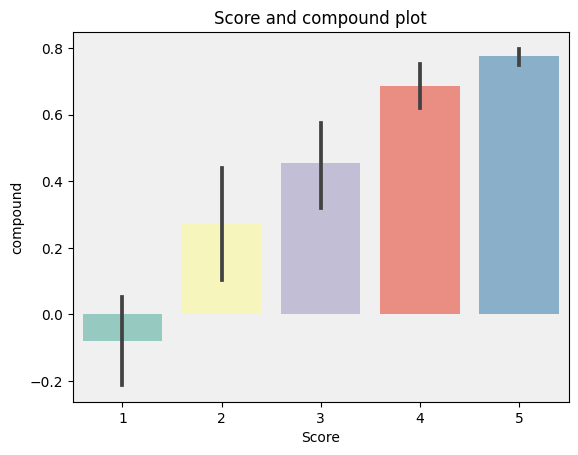

In [159]:
sns.barplot(x= df_emotions['Score'], y= df_emotions['compound'])
plt.title('Score and compound plot')
plt.show()

c:\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 69.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


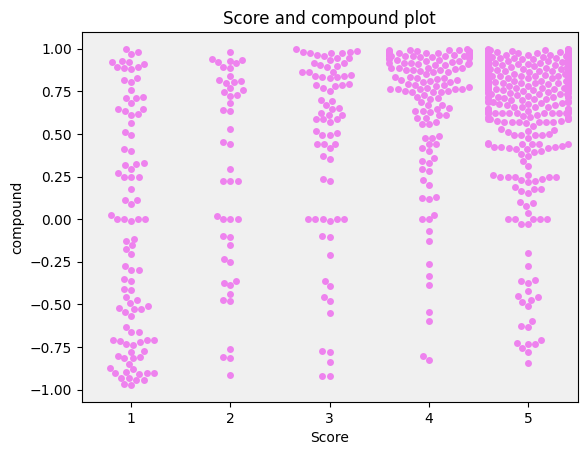

In [164]:
sns.swarmplot(x= df_emotions['Score'], y= df_emotions['compound'], color='violet')
plt.title('Score and compound plot')
plt.show()

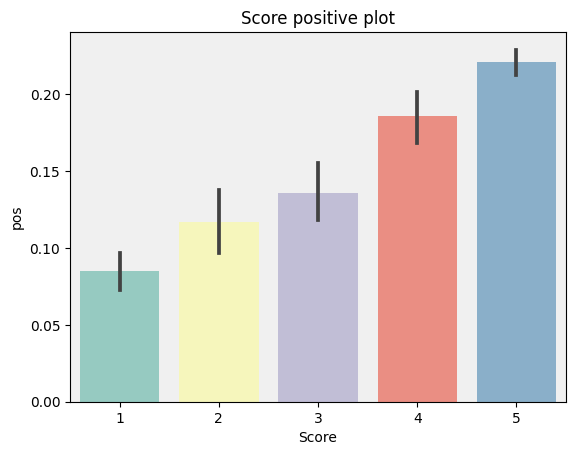

In [165]:
sns.barplot(x= df_emotions['Score'], y= df_emotions['pos'])
plt.title('Score positive plot')
plt.show()

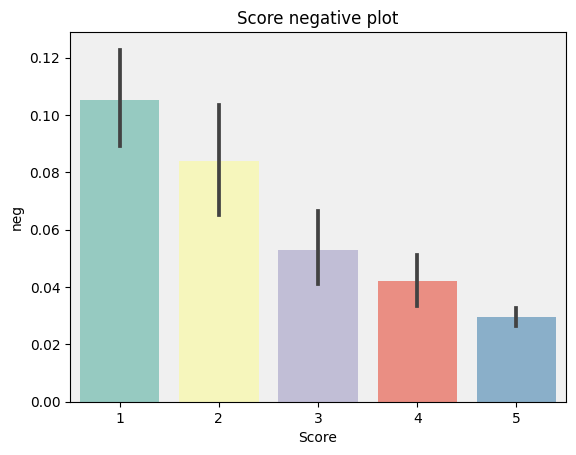

In [167]:
sns.barplot(x= df_emotions['Score'], y= df_emotions['neg'])
plt.title('Score negative plot')
plt.show()

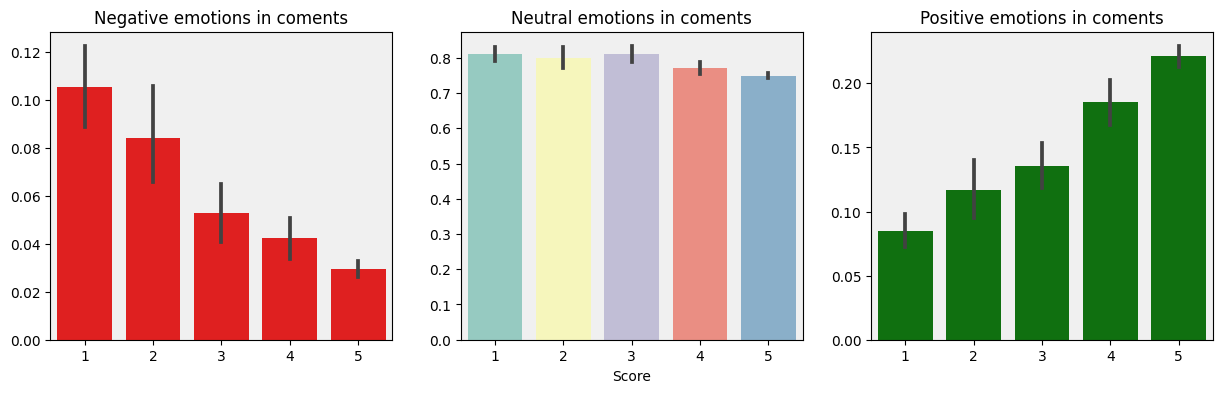

In [187]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
sns.barplot(x= df_emotions['Score'], y= df_emotions['neg'], ax=axs[0], color='red')
sns.barplot(x= df_emotions['Score'], y= df_emotions['neu'], ax=axs[1])
sns.barplot(x= df_emotions['Score'], y= df_emotions['pos'], ax=axs[2], color='green')
for ax in axs:
    ax.set_ylabel('')
    ax.set_xlabel('')
axs[1].set_xlabel('Score')
axs[0].set_title('Negative emotions in coments')
axs[1].set_title('Neutral emotions in coments')
axs[2].set_title('Positive emotions in coments')
plt.show()